# Visualization of CAR map
Results calculated in R
Visualizing in Python

In [3]:
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
## Use the ggplot style
plt.style.use('ggplot')

In [4]:
#file = '/outputs/presence_only_models/predictors/dataset100x100-puebla-p9/0-pred.csv'
#PDF = read.csv(file)
## REad adjancency matrix
mat_filename = "/outputs/training_data_sample_puebla_p9_abies_pinophyta_adjmat.npy"


TDF = pd.read_csv("/outputs/training_data_sample_puebla_p9_abies_pinophyta.csv")
## Order it according to the id of the cell
## This is important because the adjancy matrix rows need to be the same

TDF.sort_values(by='cell_ids',inplace=True)

    

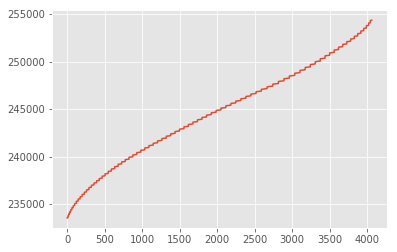

In [5]:
plt.plot(TDF.cell_ids.values)

In [6]:
TDF.shape

(4061, 25)

In [7]:
import utilities.data_extraction as de

In [8]:
nTDF = de.toGeoDataFrame(TDF,xcoord_name='Longitude',ycoord_name='Latitude')

## Extract the polygons from cells


In [9]:
from mesh.models import initMesh
from django.contrib.gis.geos import Point, Polygon
#coord = -99.76
#coord = 17.55
#xcoord = -98.219
#ycoord = 19.05
xcoord = -97.237
ycoord = 19.482
p = Point(xcoord,ycoord,srid=4326)
radii = np.linspace(0.08,2,10)
polys = map(lambda r : p.buffer(r),radii)
mexmesh = initMesh(11)
## restrict the polygons to the polygon n 3
polys = [polys[9]]
intersected_cells = map(lambda poly : mexmesh.objects.filter(cell__intersects=poly),polys)
# Number of selected cells in each buffer
values = map(lambda l : list(l.values_list('id',flat=True)),intersected_cells)
## Change to network database
from traversals.strategies import idsToCells
cells = map(lambda level : list(idsToCells(level)),values)


import shapely.wkt as wkt



DEBUG Changed MESH TABLE SPACE
INFO Compiling Query and asking the Graph Database


In [10]:
ids_poly = map(lambda c : (c.id,wkt.loads(c.polygon.wkt)),cells[0])

In [11]:
import geopandas as gpd

In [12]:
gg = gpd.GeoDataFrame(ids_poly,columns=['id','geom'])

In [13]:
gg.set_geometry('geom',inplace=True)
gg.set_index('id',inplace=True)

In [14]:
plt.rcParams['figure.figsize'] = [10, 10]

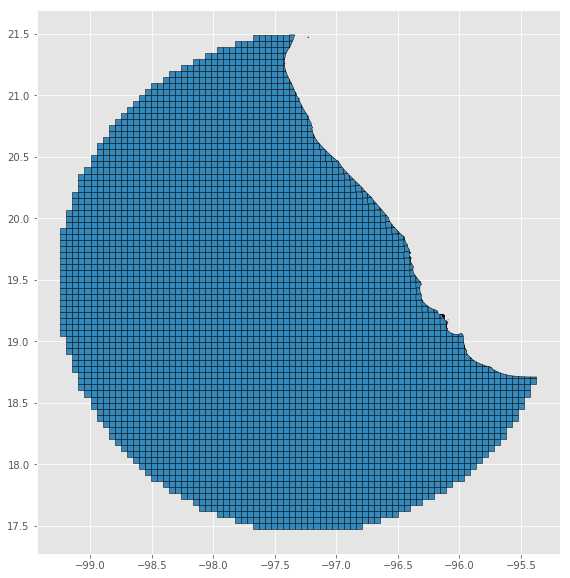

In [15]:
gg.plot(edgecolor='black')

### Develop here new pseudo-absences strategies designs
This has been done in R. 
Let's see how we can use it from here

> IMPOSIBLE TO INSTALL new version of Rpy2 due to stupid python 2/7
Continue evading the problem, as the water....

In [16]:
# Read from csv
file_ = '/outputs/presence_only_models/modelCAR_indp_fitted.csv'
#file = '/outputs/presence_only_models/modelCAR_sample_fitted.csv'

fitted_sample = pd.read_csv(file_)
fitted_sample = fitted_sample.drop(fitted_sample.columns[0],axis=1).transpose()
fitted_sample.set_index(fitted_sample.index.astype('int'),inplace=True)
#fitted_sample.set_index(fitted_sample.columns[0],inplace=True)
#fitted_sample = fitted_sample.transpose()

In [17]:
# Reduce function
def getProb(X,p=0.0,n_sample=100):
    # there is a sample here
    #X = X.sample(n=n_sample,axis=0)
    return(sum(X[X > p]) / sum(X))
    

In [18]:
# Reduce function
def mean(X,p=0.0,n_sample=100):
    # there is a sample here
    X = X.mean()
    return(X)


In [55]:
## Calculate probs on the fly
import functools as ft


def fullProbFromDF(DF,geoDataframe, p=0.0,n_sample=500):
    fig, ax = plt.subplots(1, figsize=(12, 12))
    f = ft.partial(getProb,p=p,n_sample=n_sample)
    fp = DF.apply(f,axis=1)
    fp = pd.DataFrame(fp,columns=['p'] )
    new = gg.join(fp,how='inner')
    #fp = pd.concat([ geoDataframe,fp],axis=0 )
    ac = new.plot(column='p',cmap=plt.cm.viridis,vmin=0.0,vmax=1.0,legend=True,ax=ax)
    fig.suptitle('Independent Joint Model. Probability of presence more than %s'%p)
    plt.show()
    return(None)

In [56]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual,FloatSlider
import ipywidgets as widgets

In [57]:
def f(p):
    return(fullProbFromDF(fitted_sample,gg,p=p))

In [60]:
interact_manual(f, p=FloatSlider(min=0.1,max=0.5,step=0.001,value=0.36),continuous_update=False);

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuMzYsIGRlc2NyaXB0aW9uPXUncCcsIG1heD0wLjUsIG1pbj0wLjEsIHN0ZXA9MC4wMDEpLCBCdXR0b24oZGVzY3JpcHTigKY=


In [614]:
#%timeit newD = fullProbFromDF(fitted_sample,gg,p=0.4)

#### OK ME VOY!!
mañana ver 
1. el display funciona
2. hacer el slider
3. limpiar código y correr varios modelos


In [105]:
## Let's merge dataframe
aaTDF = nTDF.set_index('cell_ids')


In [106]:
todo

,Unnamed: 0,LUCA,Plantae,Pinophyta,Abies,Dist.to.road_m,Elevation_m,MaxTemp_m,MeanTemp_m,MinTemp_m,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
233546,632.0,0.0,0.0,0.0,0.0,1229.76407064,40.8888888889,28.2768518881,23.5578703704,28.4027777778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233547,3609.0,1.0,1.0,0.0,0.0,5028.35255534,18.1111111111,28.2039215565,23.7254901961,28.3161764706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233548,2780.0,1.0,1.0,0.0,0.0,8737.19601237,-25.8888888889,28.1083332786,23.8888888889,28.2555555556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233549,1488.0,0.0,0.0,0.0,0.0,11727.9052734,-15.4444444444,27.6404761473,N.A.,N.A.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233550,415.0,0.0,0.0,0.0,0.0,14147.6627604,-6.55555555556,27.263333416,23.5833333333,27.2833333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233551,3888.0,1.0,0.0,0.0,0.0,17261.191569,1.44444444444,27.3338888804,23.5833333333,27.3541666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233552,2057.0,1.0,0.0,0.0,0.0,19857.9205387,2.57142857143,27.4639999708,23.5833333333,27.4930555556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233553,2277.0,0.0,0.0,0.0,0.0,N.A.,N.A.,N.A.,N.A.,N.A.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233747,421.0,0.0,0.0,0.0,0.0,1231.17087402,68.6666666667,28.8928240626,23.9328703704,28.9189814815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233748,3367.0,1.0,1.0,0.0,0.0,1170.31921875,70.0,28.6159721171,23.724537037,28.6527777778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
nTDF.shape

(4061, 25)

In [98]:
fitted_sample.shape

(4061, 5000)